In [1]:
import numpy as np
import pandas as pd
FAOSTAT_country_data = pd.read_csv("global-food-agriculture-statistics/FAOSTAT_countries.csv", engine='python')
FAOSTAT_countries = FAOSTAT_country_data["Country"].unique()
CONTINENTS = ['Africa', 'Asia', 'Australia and New Zealand', 'Europe', 'Northern America', 'South America']


#### Population Growth vs Deforestation

In [201]:
df = pd.read_csv("global-food-agriculture-statistics/current_FAO/raw_files/Population_E_All_Data_(Normalized).csv", engine='python')

In [202]:
df.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,Afghanistan,3010,Population - Est. & Proj.,511,Total Population - Both sexes,1950,1950,1000 persons,7752.12,XU
1,2,Afghanistan,3010,Population - Est. & Proj.,511,Total Population - Both sexes,1951,1951,1000 persons,7839.51,XU
2,2,Afghanistan,3010,Population - Est. & Proj.,511,Total Population - Both sexes,1952,1952,1000 persons,7934.98,XU
3,2,Afghanistan,3010,Population - Est. & Proj.,511,Total Population - Both sexes,1953,1953,1000 persons,8038.60,XU
4,2,Afghanistan,3010,Population - Est. & Proj.,511,Total Population - Both sexes,1954,1954,1000 persons,8150.45,XU


In [203]:
df.Element.unique()

array(['Total Population - Both sexes', 'Total Population - Male',
       'Total Population - Female', 'Rural population',
       'Urban population'], dtype=object)

In [204]:
df.Area.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belgium-Luxembourg', 'Belize', 'Benin', 'Bermuda',
       'Bhutan', 'Bolivia (Plurinational State of)',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Cayman Islands', 'Central African Republic', 'Chad',
       'Channel Islands', 'Chile', 'China', 'China, Hong Kong SAR',
       'China, Macao SAR', 'China, mainland', 'China, Taiwan Province of',
       'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica',
       "C�te d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       'Czechoslovakia', "Democratic People's Republic of Korea",
  

In [206]:
df2 = df[(df.Element.str.contains('Total Population - Both sexes'))
& (df.Area.isin(FAOSTAT_countries))]\
.groupby(["Area", "Year"])\
.Value.sum().unstack("Year")

In [207]:
df2.head()

Year,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
Area,,,,,,,,,,,,,,,,,,,,,
Afghanistan,7752.120,7839.510,7934.980,8038.600,8150.450,8270.580,8399.030,8535.810,8680.950,8834.450,...,71880.400,71755.600,71619.500,71472.800,71316.100,71150.200,70975.800,70793.70,70604.700,70409.600
Albania,1263.170,1287.500,1316.090,1348.100,1382.880,1419.970,1459.090,1500.150,1543.220,1588.480,...,1817.500,1798.030,1778.940,1760.230,1741.940,1724.060,1706.640,1689.69,1673.240,1657.310
Algeria,8872.250,9039.910,9216.400,9405.440,9609.510,9829.720,10065.800,10316.300,10578.400,10849.000,...,62825.000,62828.100,62823.800,62811.800,62791.900,62763.500,62726.400,62680.00,62623.500,62556.500
American Samoa,18.940,19.296,19.540,19.677,19.729,19.702,19.652,19.598,19.602,19.734,...,44.333,43.890,43.440,42.988,42.534,42.082,41.625,41.17,40.714,40.263
Andorra,6.196,6.689,7.247,7.865,8.525,9.232,9.989,10.779,11.615,12.498,...,64.333,64.197,64.071,63.940,63.809,63.679,63.544,63.41,63.267,63.125


In [208]:
p_diff =df2.iloc[:, 65] - df2.iloc[:, 40] #difference between year 2016 -1990
p_diff = p_diff.sort_values(ascending=False)

In [209]:
p_diff[:20]

Area
India                               438917.0
Nigeria                              85912.0
Pakistan                             81702.0
Indonesia                            76725.0
United States of America             67399.0
Brazil                               56610.0
Bangladesh                           55012.0
Democratic Republic of the Congo     41582.0
Mexico                               40533.1
Philippines                          39768.7
Egypt                                36366.0
United Republic of Tanzania          28420.4
Viet Nam                             25362.0
Turkey                               24349.8
Kenya                                23833.8
Iran (Islamic Republic of)           23134.3
Uganda                               22706.0
Afghanistan                          21487.4
Iraq                                 18646.6
South Africa                         17730.7
dtype: float64

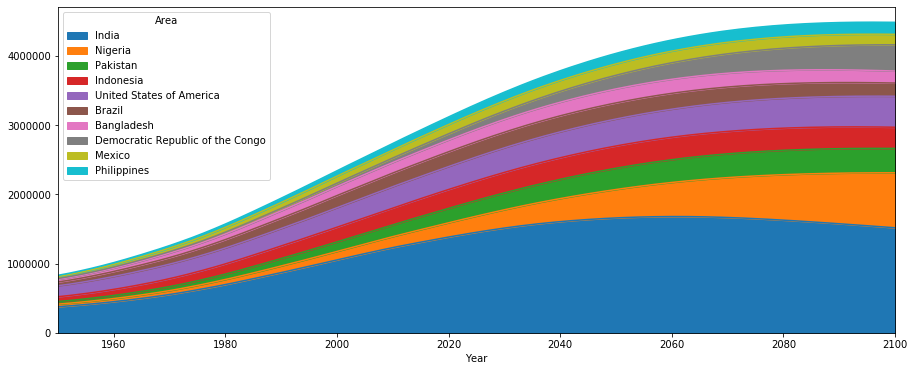

In [210]:
# By conparing following figure and figure in main.py, we found that correlation between population growth and deforestation are limited
df2.loc[p_diff[:10].index].T.plot.area(figsize=(15,6))

#### Artificial surface growth vs deforestation

In [58]:
df = pd.read_csv("global-food-agriculture-statistics/current_FAO/raw_files/Environment_LandCover_E_All_Data_(Normalized).csv", engine='python')

In [59]:
df.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,Afghanistan,6970,Artificial surfaces (including urban and assoc...,5007,Area from MODIS,2001,2001,1000 ha,71.0899,FC
1,2,Afghanistan,6970,Artificial surfaces (including urban and assoc...,5007,Area from MODIS,2002,2002,1000 ha,71.0770,FC
2,2,Afghanistan,6970,Artificial surfaces (including urban and assoc...,5007,Area from MODIS,2003,2003,1000 ha,71.0749,FC
3,2,Afghanistan,6970,Artificial surfaces (including urban and assoc...,5007,Area from MODIS,2004,2004,1000 ha,71.0563,FC
4,2,Afghanistan,6970,Artificial surfaces (including urban and assoc...,5007,Area from MODIS,2005,2005,1000 ha,71.0749,FC


In [60]:
df.Item.unique()

array(['Artificial surfaces (including urban and associated areas)',
       'Herbaceous crops', 'Woody crops', 'Multiple or layered crops',
       'Grassland', 'Tree-covered areas', 'Mangroves',
       'Shrub-covered areas',
       'Shrubs and/or herbaceous vegetation, aquatic or regularly flooded',
       'Sparsely natural vegetated areas', 'Terrestrial barren land',
       'Permanent snow and glaciers', 'Inland water bodies',
       'Coastal water bodies and intertidal areas'], dtype=object)

In [61]:
df[df.Item == 'Artificial surfaces (including urban and associated areas)'].Element.unique()

array(['Area from MODIS', 'Area from CCI_LC'], dtype=object)

In [62]:
df2 = df[df.Item == 'Artificial surfaces (including urban and associated areas)']

In [63]:
df2 = df2[(df.Element.str.contains('Area from MODIS'))
& (df2.Area.isin(FAOSTAT_countries))]\
.groupby(["Area", "Year"])\
.Value.sum().unstack("Year")

/mnt/c/linux_home/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [64]:
df2.head()

Year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
Area,,,,,,,,,,,,
Afghanistan,71.0899,71.0770,71.0749,71.0563,71.0749,71.0372,71.0846,71.0310,71.0523,71.0295,71.0306,71.0331
Albania,18.7318,18.7320,18.7377,18.7352,18.7350,18.7225,18.7241,18.7171,18.7304,18.7320,18.7377,18.7330
Algeria,301.0938,301.0922,301.0880,301.1057,301.0934,301.0994,301.0886,301.0970,301.1103,300.9938,301.1224,301.0043
American Samoa,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Andorra,1.4851,1.4838,1.4855,1.5216,1.5262,1.5211,1.4833,1.5211,1.4798,1.5216,1.5266,1.5252


In [65]:
# this figure is close to JPN Gov. data, area of housing
df2.loc['Japan']

Year
2001    1869.9430
2002    1868.3569
2003    1869.3215
2004    1869.8328
2005    1870.6500
2006    1868.8959
2007    1869.0325
2008    1867.5417
2009    1868.8052
2010    1870.2912
2011    1871.2701
2012    1870.2925
Name: Japan, dtype: float64

In [67]:
p_diff =df2.iloc[:, 11] - df2.iloc[:, 0] #difference between year 2012 -2001
p_diff = p_diff.sort_values(ascending=False)

In [68]:
# growth of artificial area is small
p_diff[:20]

Area
Hungary                          3.6865
Republic of Korea                3.3520
India                            2.1570
Spain                            1.4227
Singapore                        1.3507
Bahrain                          1.2114
Romania                          1.1982
Austria                          0.9909
Turkey                           0.9358
Ghana                            0.5951
France                           0.5171
Jordan                           0.4618
Mexico                           0.4568
Netherlands                      0.4275
Japan                            0.3495
Portugal                         0.3360
Ukraine                          0.3281
Netherlands Antilles (former)    0.2704
Slovakia                         0.2177
Belgium                          0.2123
dtype: float64

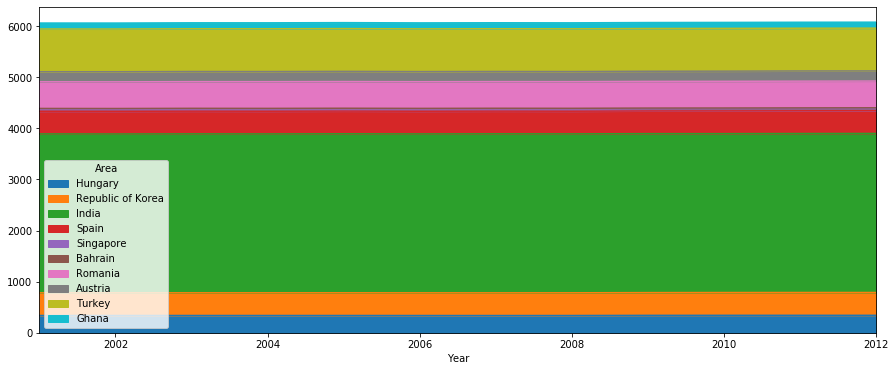

In [69]:
# growth of artificial area is small, so its impact on deforestation is negligible
df2.loc[p_diff[:10].index].T.plot.area(figsize=(15,6))

#### Growth of Tree-covered areas match to deforestation trend? 

In [28]:
df3 = df[df.Item == 'Tree-covered areas']

In [29]:
df3 = df3[(df.Element.str.contains('Area from MODIS'))
& (df3.Area.isin(FAOSTAT_countries))]\
.groupby(["Area", "Year"])\
.Value.sum().unstack("Year")

/mnt/c/linux_home/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [30]:
df3.head()

Year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
Area,,,,,,,,,,,,
Afghanistan,277.8579,257.0200,231.4933,219.8316,234.2625,230.6606,254.0050,237.3392,325.2375,325.6402,372.6691,385.0191
Albania,445.3538,481.3801,420.6624,496.9820,399.5119,531.2831,586.5037,721.3579,760.7334,790.5335,813.6812,758.7507
Algeria,1007.2961,961.4381,884.2037,913.2712,948.4441,973.3383,893.1138,952.0809,830.2515,1083.5742,895.4800,1022.4781
American Samoa,15.6778,14.5878,14.7643,13.0864,14.0231,14.5090,13.8411,14.5132,13.2618,14.1558,13.2383,13.5248
Andorra,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [34]:
p_diff =df3.iloc[:, 11] - df3.iloc[:, 0] #difference between year 2012 -2001
p_diff = p_diff.sort_values(ascending=False)

In [35]:
# the number of tree covered area in the dataset are much smaller. 
# the tree-covered area has different definition from forest areas.
p_diff[:20]

Area
Canada                                   28937.2791
Brazil                                   17876.2240
Russian Federation                       15986.9831
Democratic Republic of the Congo          4501.9781
United States of America                  4455.4586
Venezuela (Bolivarian Republic of)        4113.5631
Philippines                               3702.2337
Spain                                     2324.8984
Mozambique                                2244.0904
United Republic of Tanzania               1906.5988
Zimbabwe                                  1788.7810
Italy                                     1529.5486
Angola                                    1274.5022
Greece                                    1246.7949
Finland                                   1213.6261
Japan                                     1141.4283
Belarus                                   1131.6412
Democratic People's Republic of Korea     1035.7589
Ukraine                                   1033.9311
Liberia

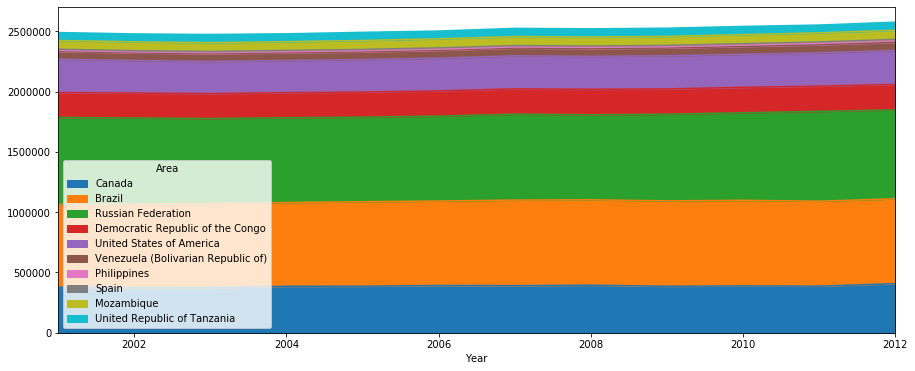

In [37]:
df3.loc[p_diff[:10].index].T.plot.area(figsize=(15,6))

In [46]:
df3.loc['Brazil']

Year
2001    685469.5644
2002    692677.7111
2003    698455.3295
2004    694022.4639
2005    700465.8199
2006    699923.3961
2007    709080.7868
2008    707793.9751
2009    707654.8192
2010    709549.5345
2011    704056.5881
2012    703345.7884
Name: Brazil, dtype: float64

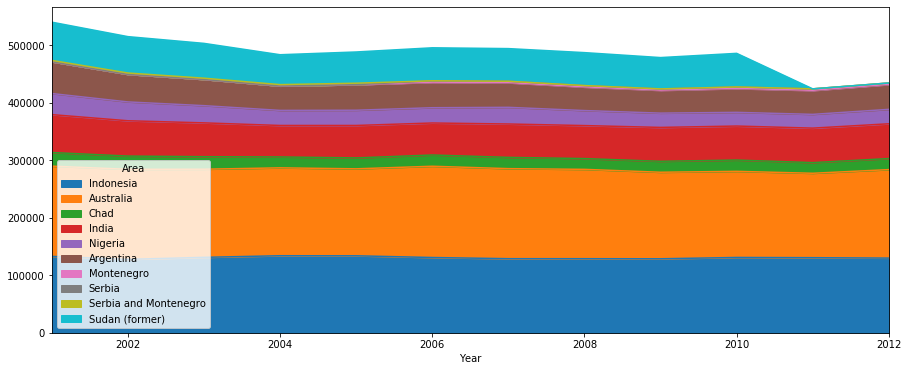

In [41]:
df3.loc[p_diff[-10:].index].T.plot.area(figsize=(15,6))

In [14]:
df = pd.read_csv("global-food-agriculture-statistics/current_FAO/raw_files/Value_of_Production_E_All_Data_(Normalized).csv", engine='python')

In [15]:
df.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,Afghanistan,1770,"Meat indigenous, total",152,Gross Production Value (constant 2004-2006 100...,1961,1961,1000 Int. $,336086.0,A
1,2,Afghanistan,1770,"Meat indigenous, total",152,Gross Production Value (constant 2004-2006 100...,1962,1962,1000 Int. $,342715.0,A
2,2,Afghanistan,1770,"Meat indigenous, total",152,Gross Production Value (constant 2004-2006 100...,1963,1963,1000 Int. $,359908.0,A
3,2,Afghanistan,1770,"Meat indigenous, total",152,Gross Production Value (constant 2004-2006 100...,1964,1964,1000 Int. $,373805.0,A
4,2,Afghanistan,1770,"Meat indigenous, total",152,Gross Production Value (constant 2004-2006 100...,1965,1965,1000 Int. $,389478.0,A


In [16]:
df.Item.unique()

array(['Meat indigenous, total', 'Milk,Total', 'Oilcrops Primary',
       'Roots and Tubers,Total', 'Sugar, raw',
       'Vegetables and Fruit Primary', 'Almonds, with shell',
       'Anise, badian, fennel, coriander', 'Apples', 'Apricots', 'Barley',
       'Berries nes', 'Cotton lint', 'Cottonseed', 'Eggs, hen, in shell',
       'Figs', 'Fruit, citrus nes', 'Fruit, fresh nes',
       'Fruit, stone nes', 'Grapes', 'Honey, natural', 'Linseed', 'Maize',
       'Meat indigenous, camel', 'Meat indigenous, cattle',
       'Meat indigenous, chicken', 'Meat indigenous, goat',
       'Meat indigenous, sheep', 'Meat, game',
       'Melons, other (inc.cantaloupes)', 'Milk, whole fresh camel',
       'Milk, whole fresh cow', 'Milk, whole fresh goat',
       'Milk, whole fresh sheep', 'Millet', 'Nuts, nes', 'Olives',
       'Oranges', 'Peaches and nectarines', 'Pears', 'Pistachios',
       'Plums and sloes', 'Potatoes', 'Pulses, nes', 'Rice, paddy',
       'Sesame seed', 'Silk-worm cocoons, reelab

#### Agricultural Area Growth % in the area of the country

In [168]:
df = pd.read_csv("global-food-agriculture-statistics/current_FAO/raw_files/Environment_LandUse_E_All_Data_(Normalized).csv", engine='python')

In [169]:
df.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,Afghanistan,6621,Arable land,7208,Share in Agricultural area,1961,1961,%,20.29,Fc
1,2,Afghanistan,6621,Arable land,7208,Share in Agricultural area,1962,1962,%,20.39,Fc
2,2,Afghanistan,6621,Arable land,7208,Share in Agricultural area,1963,1963,%,20.50,Fc
3,2,Afghanistan,6621,Arable land,7208,Share in Agricultural area,1964,1964,%,20.60,Fc
4,2,Afghanistan,6621,Arable land,7208,Share in Agricultural area,1965,1965,%,20.59,Fc


In [170]:
df[df.Area == 'Brazil'][df.Year == 2000]

/mnt/c/linux_home/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
11191,21,Brazil,6621,Arable land,7208,Share in Agricultural area,2000,2000,%,22.10,Fc
11246,21,Brazil,6650,Permanent crops,7208,Share in Agricultural area,2000,2000,%,2.84,Fc
11301,21,Brazil,6620,Arable land and Permanent crops,7209,Share in Land area,2000,2000,%,7.80,Fc
11355,21,Brazil,6655,Permanent meadows and pastures,7208,Share in Agricultural area,2000,2000,%,75.06,Fc
11410,21,Brazil,6655,Permanent meadows and pastures,7209,Share in Land area,2000,2000,%,23.47,Fc
11465,21,Brazil,6690,Total area equipped for irrigation,7208,Share in Agricultural area,2000,2000,%,1.26,Fc
11520,21,Brazil,6610,Agricultural area,7209,Share in Land area,2000,2000,%,31.28,Fc
11545,21,Brazil,6661,Forest,7209,Share in Land area,2000,2000,%,62.37,Fc
11570,21,Brazil,6714,Primary forest,7210,Share in Forest area,2000,2000,%,40.38,Fc
11596,21,Brazil,6716,Planted forest,7210,Share in Forest area,2000,2000,%,0.99,Fc


In [74]:
df.Item.unique()
# Forest = area of forest, share in land area
# Agricultural area = share in land area
# others = share in forest / agricu;tural area

array(['Arable land', 'Permanent crops',
       'Arable land and Permanent crops',
       'Permanent meadows and pastures',
       'Agricultural area actually irrigated',
       'Total area equipped for irrigation', 'Agricultural area',
       'Forest', 'Primary forest', 'Planted forest',
       'Other naturally regenerated forest'], dtype=object)

In [85]:
df4 = df[df.Item == 'Agricultural area']

In [86]:
df4 = df4[(df4.Area.isin(FAOSTAT_countries))]\
.groupby(["Area", "Year"])\
.Value.sum().unstack("Year")

In [91]:
df4.loc['Brazil']

Year
1961    18.01
1962    18.65
1963    19.32
1964    19.87
1965    20.39
1966    20.95
1967    21.49
1968    22.16
1969    23.18
1970    23.38
1971    23.88
1972    24.27
1973    24.63
1974    25.13
1975    25.53
1976    25.84
1977    26.15
1978    26.33
1979    26.62
1980    26.83
1981    27.02
1982    27.30
1983    27.38
1984    27.51
1985    27.64
1986    28.00
1987    28.21
1988    28.44
1989    28.65
1990    28.91
1991    29.31
1992    29.52
1993    29.85
1994    30.08
1995    30.92
1996    30.99
1997    31.06
1998    31.12
1999    31.20
2000    31.28
2001    31.52
2002    31.81
2003    32.12
2004    32.56
2005    32.59
2006    32.64
2007    32.50
2008    32.72
2009    32.73
2010    32.72
2011    32.95
2012    32.97
2013    33.36
2014    33.81
Name: Brazil, dtype: float64

In [93]:
p_diff =df4.iloc[:, 53] - df4.iloc[:,30] #difference between year 2014 -1990
p_diff = p_diff.sort_values(ascending=False)

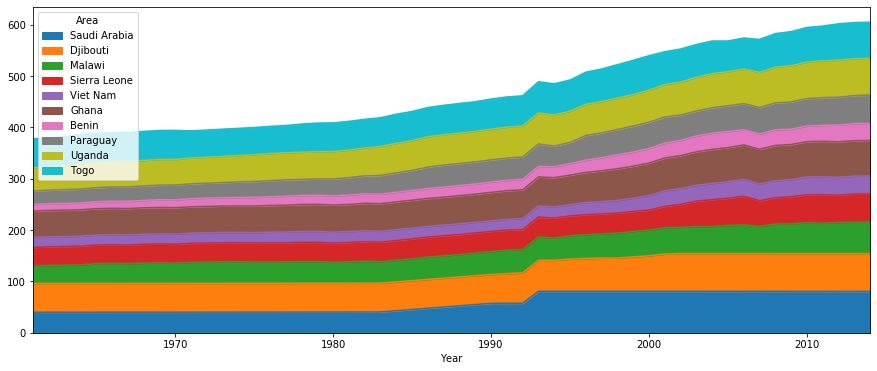

In [95]:
df4.loc[p_diff[:10].index].T.plot.area(figsize=(15,6))

#### Agricultural Area Growth: the number of area [ha]

In [186]:
df = pd.read_csv("global-food-agriculture-statistics/current_FAO/raw_files/Inputs_Land_E_All_Data_(Normalized).csv", engine='python')

In [187]:
df.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,Afghanistan,6600,Country area,5110,Area,1961,1961,1000 ha,65286.0,W
1,2,Afghanistan,6600,Country area,5110,Area,1962,1962,1000 ha,65286.0,W
2,2,Afghanistan,6600,Country area,5110,Area,1963,1963,1000 ha,65286.0,W
3,2,Afghanistan,6600,Country area,5110,Area,1964,1964,1000 ha,65286.0,W
4,2,Afghanistan,6600,Country area,5110,Area,1965,1965,1000 ha,65286.0,W


In [173]:
df[df.Area == 'Brazil'][df.Year ==2000]

/mnt/c/linux_home/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
15556,21,Brazil,6600,Country area,5110,Area,2000,2000,1000 ha,851577.00,Q
15610,21,Brazil,6601,Land area,5110,Area,2000,2000,1000 ha,835814.00,Fm
15664,21,Brazil,6610,Agricultural area,5110,Area,2000,2000,1000 ha,261406.00,F
15733,21,Brazil,6620,Arable land and Permanent crops,5110,Area,2000,2000,1000 ha,65200.00,F
15787,21,Brazil,6621,Arable land,5110,Area,2000,2000,1000 ha,57776.40,Fm
15844,21,Brazil,6650,Permanent crops,5110,Area,2000,2000,1000 ha,7423.60,Fm
15898,21,Brazil,6655,Permanent meadows and pastures,5110,Area,2000,2000,1000 ha,196206.00,F
15923,21,Brazil,6661,Forest,5110,Area,2000,2000,1000 ha,521274.00,Q
15948,21,Brazil,6661,Forest,72151,Carbon stock in living biomass,2000,2000,million tonnes,61816.42,Q
15973,21,Brazil,6714,Primary forest,5110,Area,2000,2000,1000 ha,210466.00,Q


In [174]:
df.Item.unique()

array(['Country area', 'Land area', 'Agricultural area',
       'Agricultural area organic, total',
       'Agricultural area certified organic',
       'Agricultural area in conversion to organic',
       'Agricultural area actually irrigated',
       'Arable land and Permanent crops', 'Arable land',
       'Temporary crops', 'Fallow land (temporary)', 'Permanent crops',
       'Permanent meadows and pastures',
       'Perm. meadows & pastures - Nat. growing', 'Forest',
       'Primary forest', 'Other naturally regenerated forest',
       'Planted forest', 'Other land',
       'Total area equipped for irrigation', 'Arable land organic, total',
       'Arable land area certified organic',
       'Temporary meadows and pastures', 'Permanent crops organic, total',
       'Permanent crops area certified organic', 'Inland water',
       'Area of arable land and permanent crops under protective cover',
       'Perm. meadows & pastures - Cultivated',
       'Arable land area in conversion to

In [175]:
df5 = df[df.Item == 'Agricultural area']

In [176]:
df5 = df5[(df5.Area.isin(FAOSTAT_countries))]\
.groupby(["Area", "Year"])\
.Value.sum().unstack("Year")

In [177]:
df5.head()

Year,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Area,,,,,,,,,,,,,,,,,,,,,
Afghanistan,37700.0,37760.0,37810.0,37873.0,37875.0,37913.0,37979.0,37980.0,37996.0,38006.0,...,37910.0,37910.0,37910.0,37910.0,37910.0,37910.0,37911.0,37910.00,37910.00,37910.00
Albania,1232.0,1232.0,1233.0,1230.0,1237.0,1240.0,1244.0,1240.0,1235.0,1230.0,...,1077.0,1120.0,1119.0,1181.0,1201.3,1201.3,1201.0,1201.30,1187.30,1174.29
Algeria,45471.0,44900.0,44510.0,44164.0,44167.0,44167.0,44251.0,44203.0,44203.0,44216.0,...,41211.0,41181.0,41252.0,41309.0,41380.0,41374.0,41388.0,41398.19,41431.64,41431.00
American Samoa,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,5.0,5.0,4.8,4.8,4.9,4.9,4.9,4.90,4.90,4.90
Andorra,26.0,26.0,26.0,26.0,26.0,26.0,26.0,26.0,26.0,26.0,...,19.7,19.5,19.4,19.7,19.9,20.1,20.4,20.20,20.80,20.90


In [178]:
p_diff =df5.iloc[:, 53] - df5.iloc[:,30] #difference between year 2014 -1990
p_diff = p_diff.sort_values(ascending=False)

In [179]:
p_diff.head(20)

Area
Saudi Arabia                   49975.2
Brazil                         37648.0
Argentina                      21040.0
Indonesia                      15476.0
Niger                          10677.0
Mali                            9063.0
United Republic of Tanzania     7247.0
Nigeria                         6871.0
Madagascar                      5065.0
Paraguay                        4690.0
Viet Nam                        4122.7
Zimbabwe                        3020.0
Zambia                          3010.0
Ghana                           2980.0
Algeria                         2809.0
Burkina Faso                    2550.0
Peru                            2434.6
Uganda                          2383.0
Myanmar                         2229.0
Mozambique                      2220.0
dtype: float64

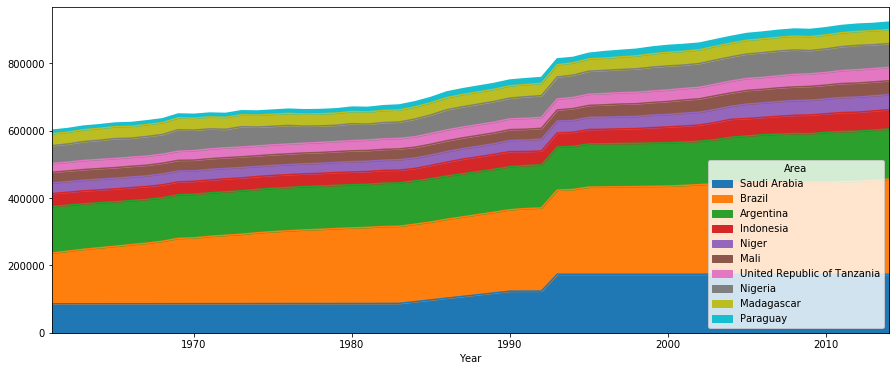

In [180]:
df5.loc[p_diff[:10].index].T.plot.area(figsize=(15,6))

In [188]:
df_f = df[df.Item == 'Forest']

In [189]:
df_f = df_f[(df_f.Area.isin(FAOSTAT_countries))]\
.groupby(["Area", "Year"])\
.Value.sum().unstack("Year")

In [190]:
df_f.head()

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Area,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1388.30,1388.30,1388.30,1388.30,1388.30,1388.30,1388.30,1388.30,1388.30,1388.30,...,1388.30,1388.30,1388.30,1388.30,1388.30,1388.30,1388.30,1388.30,1388.30,1388.30
Albania,838.00,836.06,834.12,832.18,830.24,828.30,826.36,824.42,822.48,820.54,...,830.70,829.58,828.46,827.34,826.22,825.10,824.28,823.46,822.64,821.82
Algeria,1708.70,1699.66,1690.62,1681.58,1672.54,1663.50,1654.46,1645.42,1636.38,1627.34,...,1574.60,1652.84,1731.08,1809.32,1887.56,1965.80,1973.52,1981.24,1988.96,1996.68
American Samoa,20.41,20.36,20.33,20.29,20.25,20.22,20.18,20.14,20.11,20.06,...,19.84,19.81,19.76,19.73,19.70,19.65,19.62,19.58,19.55,19.51
Andorra,16.65,16.65,16.66,16.67,16.67,16.68,16.68,16.69,16.69,16.70,...,16.74,16.75,16.76,16.77,16.78,16.79,16.80,16.81,16.81,16.82


In [197]:
p_diff =df_f.iloc[:, 0] - df_f.iloc[:,24] #difference between year 2014 -1990
p_diff = p_diff.sort_values(ascending=False)

In [198]:
p_diff.head(20)

Area
Brazil                                57093.30
Indonesia                             31469.40
Nigeria                               10962.40
United Republic of Tanzania           10608.28
Myanmar                               10098.78
Democratic Republic of the Congo       8426.00
Bolivia (Plurinational State of)       8268.35
Zimbabwe                               8034.65
Argentina                              7875.00
Colombia                               6744.69
Paraguay                               6129.27
Cameroon                               5994.40
Venezuela (Bolivarian Republic of)     5680.76
Mozambique                             5458.40
Zambia                                 4167.41
Peru                                   4128.11
Australia                              4049.75
Mexico                                 3722.40
Honduras                               3641.40
Cambodia                               3529.40
dtype: float64

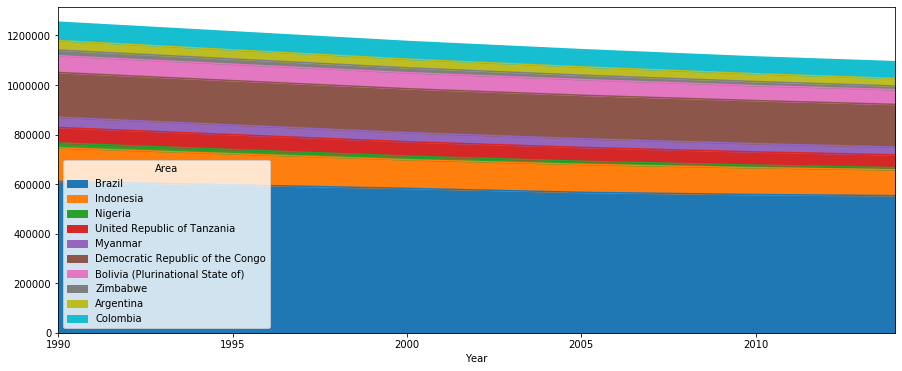

In [199]:
df_f.loc[p_diff[:10].index].T.plot.area(figsize=(15,6))

In [114]:
df = pd.read_csv("global-food-agriculture-statistics/current_FAO/raw_files/CommodityBalances_LivestockFish_E_All_Data_(Normalized).csv", engine='python')

In [115]:
df.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,Afghanistan,2731,Bovine Meat,5510,Production,1961,1961,tonnes,43000.0,S
1,2,Afghanistan,2731,Bovine Meat,5510,Production,1962,1962,tonnes,45800.0,S
2,2,Afghanistan,2731,Bovine Meat,5510,Production,1963,1963,tonnes,47250.0,S
3,2,Afghanistan,2731,Bovine Meat,5510,Production,1964,1964,tonnes,48000.0,S
4,2,Afghanistan,2731,Bovine Meat,5510,Production,1965,1965,tonnes,48700.0,S


In [116]:
df.Item.unique()

array(['Bovine Meat', 'Butter, Ghee', 'Cheese', 'Cream', 'Eggs',
       'Fats, Animals, Raw', 'Freshwater Fish', 'Hides and skins',
       'Honey', 'Meat, Other', 'Milk - Excluding Butter', 'Milk, Skimmed',
       'Milk, Whole', 'Mutton & Goat Meat', 'Offals, Edible',
       'Poultry Meat', 'Silk', 'Whey', 'Wool (Clean Eq.)', 'Animal fats',
       'Fish, Seafood', 'Meat', 'Offals', 'Aquatic Animals, Others',
       'Aquatic Plants', 'Cephalopods', 'Crustaceans', 'Demersal Fish',
       'Fish Meal', 'Fish, Body Oil', 'Fish, Liver Oil',
       'Marine Fish, Other', 'Meat Meal', 'Molluscs, Other',
       'Pelagic Fish', 'Pigmeat', 'Aquatic Products, Other',
       'Meat, Aquatic Mammals'], dtype=object)

In [117]:
df.Element.unique()

array(['Production', 'Import Quantity', 'Domestic supply quantity',
       'Food supply quantity (tonnes)', 'Seed', 'Waste', 'Other uses',
       'Stock Variation', 'Export Quantity', 'Feed', 'Processing'],
      dtype=object)

In [148]:
df = pd.read_csv("global-food-agriculture-statistics/current_FAO/raw_files/Production_Livestock_E_All_Data_(Normalized).csv", engine='python')

In [149]:
df.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,Afghanistan,1107,Asses,5111,Stocks,1961,1961,Head,1300000.0,NaN
1,2,Afghanistan,1107,Asses,5111,Stocks,1962,1962,Head,851850.0,NaN
2,2,Afghanistan,1107,Asses,5111,Stocks,1963,1963,Head,1001112.0,NaN
3,2,Afghanistan,1107,Asses,5111,Stocks,1964,1964,Head,1150000.0,F
4,2,Afghanistan,1107,Asses,5111,Stocks,1965,1965,Head,1300000.0,NaN


In [150]:
df.Element.unique()

array(['Stocks'], dtype=object)

In [151]:
df.Item.unique()

array(['Asses', 'Camels', 'Cattle', 'Chickens', 'Goats', 'Horses',
       'Mules', 'Sheep', 'Cattle and Buffaloes', 'Poultry Birds',
       'Sheep and Goats', 'Beehives', 'Buffaloes', 'Ducks',
       'Geese and guinea fowls', 'Pigs', 'Turkeys', 'Rabbits and hares',
       'Camelids, other', 'Rodents, other', 'Animals live nes',
       'Pigeons, other birds'], dtype=object)

In [ ]:
df = pd.read_csv("global-food-agriculture-statistics/current_FAO/raw_files/Trade_Crops_Livestock_E_All_Data_(Normalized).csv", engine='python')

In [ ]:
df.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,Afghanistan,231,Almonds shelled,5910,Export Quantity,1961,1961,tonnes,0.0,NaN
1,2,Afghanistan,231,Almonds shelled,5910,Export Quantity,1962,1962,tonnes,0.0,NaN
2,2,Afghanistan,231,Almonds shelled,5910,Export Quantity,1963,1963,tonnes,0.0,NaN
3,2,Afghanistan,231,Almonds shelled,5910,Export Quantity,1964,1964,tonnes,0.0,NaN
4,2,Afghanistan,231,Almonds shelled,5910,Export Quantity,1965,1965,tonnes,0.0,NaN


In [154]:
df.Element.unique()

array(['Export Quantity', 'Export Value', 'Import Quantity',
       'Import Value'], dtype=object)

In [155]:
df.Item.unique()

array(['Almonds shelled', 'Anise, badian, fennel, coriander', 'Apples',
       'Apricots', 'Apricots, dry', 'Bananas', 'Barley', 'Beer of barley',
       'Beverages, distilled alcoholic', 'Beverages, non alcoholic',
       'Bread', 'Butter, cow milk', 'Cake, cottonseed',
       'Cheese, whole cow milk', 'Chocolate products nes', 'Cigarettes',
       'Coconuts, desiccated', 'Coffee, extracts', 'Coffee, green',
       'Cotton lint', 'Cottonseed', 'Cream fresh', 'Crude materials',
       'Dates', 'Eggs, hen, in shell', 'Fat, nes, prepared',
       'Fatty acids', 'Figs', 'Figs dried', 'Flour, cereals',
       'Flour, wheat', 'Food prep nes', 'Forage products',
       'Fruit, dried nes', 'Fruit, fresh nes', 'Fruit, prepared nes',
       'Grapes', 'Hair, fine', 'Hides, cattle, wet salted',
       'Honey, natural', 'Infant food', 'Jute', 'Linseed', 'Macaroni',
       'Maize', 'Margarine, short', 'Meat, cattle', 'Meat, chicken',
       'Meat, goat', 'Melons, other (inc.cantaloupes)',
       'M